In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_0 = pd.read_csv('data/kc_house_data.csv')

In [3]:
df = pd.read_csv("clean_df.csv")

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True, axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   price          21420 non-null  float64
 2   bedrooms       21420 non-null  int64  
 3   bathrooms      21420 non-null  float64
 4   sqft_living    21420 non-null  int64  
 5   sqft_lot       21420 non-null  int64  
 6   floors         21420 non-null  float64
 7   waterfront     21420 non-null  int64  
 8   condition      21420 non-null  int64  
 9   grade          21420 non-null  int64  
 10  sqft_above     21420 non-null  int64  
 11  sqft_basement  21420 non-null  float64
 12  yr_built       21420 non-null  int64  
 13  zipcode        21420 non-null  int64  
 14  lat            21420 non-null  float64
 15  long           21420 non-null  float64
 16  sqft_living15  21420 non-null  int64  
 17  sqft_lot15     21420 non-null  int64  
 18  month 

In [6]:
df.drop(columns=['id'],inplace=True, axis=1)

# Modeling

### Baseline: Model 0

The baseline model shows our initial accuracy of the model, and compare adjusted models to it.

In [7]:
from statsmodels.formula.api import ols

In [8]:
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_variables = '+'.join(predictors.columns)
formula = outcome + '~' + pred_variables

In [9]:
formula

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+condition+grade+sqft_above+sqft_basement+yr_built+zipcode+lat+long+sqft_living15+sqft_lot15+month'

In [10]:
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_variables = '+'.join(predictors.columns)
formula = outcome + '~' + pred_variables

In [11]:
baseline_model = ols(formula = formula, data=df).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     2823.
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:29:32   Log-Likelihood:            -2.9231e+05
No. Observations:               21420   AIC:                         5.846e+05
Df Residuals:                   21402   BIC:                         5.848e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.238e+05   2.97e+06      0.075      0.940   -5.59e+06    6.04e+06
bedrooms       -4.04e+04   1934.889    -20.878      0.000   -4.42e+04   -3.66e+04
bathrooms      4.658e+04   3302.961     14.101      0.000    4.01e+04    5.31e+04
sqft_living     119.2517     18.349      6.499      0.000      83.286     155.217
sqft_lot          0.1617      0.049      3.321      0.001       0.066       0.257
floors         1.091e+04   3661.844      2.979      0.003    3732.626    1.81e+04
waterfront     7.857e+05   1.72e+04     45.658      0.000    7.52e+05    8.19e+05
condition      2.623e+04   2369.822     11.068      0.000    2.16e+04    3.09e+04
grade          1.022e+05   2194.645     46.585      0.000    9.79e+04    1.07e+05
sqft_above       60.3419     18.338      3.291      0.001      24.398      96.286
sqft_basement    48.4372     18.187      2.663      0.008      12.789      84.085
yr_built      -2929.7937     69.907    -41.910      0.000   -3066.817   -2792.771
zipcode        -516.0531     33.523    -15.394      0.000    -581.761    -450.346
lat            5.745e+05   1.09e+04     52.754      0.000    5.53e+05    5.96e+05
long            -2.3e+05   1.34e+04    -17.173      0.000   -2.56e+05   -2.04e+05
sqft_living15    33.6555      3.467      9.706      0.000      26.859      40.452
sqft_lot15       -0.3658      0.075     -4.907      0.000      -0.512      -0.220
month         -3087.4732    449.726     -6.865      0.000   -3968.970   -2205.977
==============================================================================
Omnibus:                    18049.042   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1708454.791
Skew:                           3.534   Prob(JB):                         0.00
Kurtosis:                      46.177   Cond. No.                     2.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The baseline model shows an intercept of 223800 and an r-squared of 0.692.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21420 non-null  float64
 1   bedrooms       21420 non-null  int64  
 2   bathrooms      21420 non-null  float64
 3   sqft_living    21420 non-null  int64  
 4   sqft_lot       21420 non-null  int64  
 5   floors         21420 non-null  float64
 6   waterfront     21420 non-null  int64  
 7   condition      21420 non-null  int64  
 8   grade          21420 non-null  int64  
 9   sqft_above     21420 non-null  int64  
 10  sqft_basement  21420 non-null  float64
 11  yr_built       21420 non-null  int64  
 12  zipcode        21420 non-null  int64  
 13  lat            21420 non-null  float64
 14  long           21420 non-null  float64
 15  sqft_living15  21420 non-null  int64  
 16  sqft_lot15     21420 non-null  int64  
 17  month          21420 non-null  int64  
dtypes: flo

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
X = df.drop(columns=['price'], axis=1)
y= df['price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, test_size=.20)

In [16]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17136 4284 17136 4284


In [17]:
baseline_linreg = LinearRegression()

In [18]:
baseline_linreg.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = baseline_linreg.predict(X_test)

In [20]:
residuals = y_pred - y_test

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train), squared=False)
mse_train

205615.87903853058

In [23]:
mse_test = mean_squared_error(y_test, y_pred, squared=False)
mse_test

199326.93089837796

In [24]:
import statsmodels.api as sm
import scipy.stats as stats

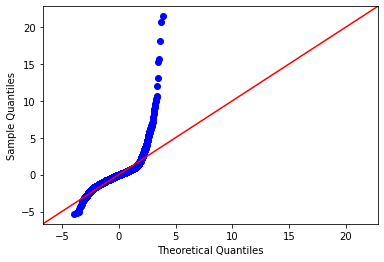

In [25]:
fig = sm.graphics.qqplot(baseline_model.resid, dist=stats.norm, line='45', fit=True)

### Filtering Data: Model 1 

This model will be adjusted for outliers that can be extraneous info to accurately form a model. 

In [26]:
df_filter = pd.read_csv('filter_df.csv')
df_filter

Unnamed: 0          id      price  bedrooms  bathrooms  sqft_living  \
0               0  7129300520   221900.0         3       1.00         1180   
1               1  6414100192   538000.0         3       2.25         2570   
2               2  5631500400   180000.0         2       1.00          770   
3               3  2487200875   604000.0         4       3.00         1960   
4               4  1954400510   510000.0         3       2.00         1680   
...           ...         ...        ...       ...        ...          ...   
19880       21413  7936000429  1010000.0         4       3.50         3510   
19881       21414  2997800021   475000.0         3       2.50         1310   
19882       21415   263000018   360000.0         3       2.50         1530   
19883       21416  6600060120   400000.0         4       2.50         2310   
19884       21418   291310100   400000.0         3       2.50         1600   

       sqft_lot  floors  waterfront  condition  grade  sqft_above  \
0          5650     1.0           0          3      7        1180   
1          7242     2.0           0          3      7        2170   
2         10000     1.0           0          3      6         770   
3          5000     1.0           0          5      7        1050   
4          8080     1.0           0          3      8        1680   
...         ...     ...         ...        ...    ...         ...   
19880      7200     2.0           0          3      9        2600   
19881      1294     2.0           0          3      8        1180   
19882      1131     3.0           0          3      8        1530   
19883      5813     2.0           0          3      8        2310   
19884      2388     2.0           0          3      8        1600   

       sqft_basement  yr_built  zipcode      lat     long  sqft_living15  \
0                0.0      1955    98178  47.5112 -122.257           1340   
1              400.0      1951    98125  47.7210 -122.319           1690   
2                0.0      1933    98028  47.7379 -122.233           2720   
3              910.0      1965    98136  47.5208 -122.393           1360   
4                0.0      1987    98074  47.6168 -122.045           1800   
...              ...       ...      ...      ...      ...            ...   
19880          910.0      2009    98136  47.5537 -122.398           2050   
19881          130.0      2008    98116  47.5773 -122.409           1330   
19882            0.0      2009    98103  47.6993 -122.346           1530   
19883            0.0      2014    98146  47.5107 -122.362           1830   
19884            0.0      2004    98027  47.5345 -122.069           1410   

       sqft_lot15  month  
0            5650     10  
1            7639     12  
2            8062      2  
3            5000     12  
4            7503      2  
...           ...    ...  
19880        6200      3  
19881        1265      2  
19882        1509      5  
19883        7200      2  
19884        1287      1  

[19885 rows x 20 columns]

In [27]:
df_filter.drop(columns=['Unnamed: 0', 'id'], inplace=True, axis=1)

Filtered columns:
 - Bedrooms less than or equal to 7
 - Bathrooms between 1 and 5
 - Squarefoot lot less than 25,0000
 - Squarefoot above basement less than 4,000
 - Squarefoot basement less than 1,500
 - Squarefoot lot of 15 nearest houses, less than 60,000
 - Floors less than or equal to 3
 - Grade between 4 and 11

In [28]:
outcome = 'price'
predictors = df_filter.drop('price', axis=1)
pred_variables = '+'.join(predictors.columns)
formula = outcome + '~' + pred_variables

In [29]:
formula

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+condition+grade+sqft_above+sqft_basement+yr_built+zipcode+lat+long+sqft_living15+sqft_lot15+month'

In [30]:
model_1 = ols(formula = formula, data=df_filter).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     2307.
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:29:34   Log-Likelihood:            -2.6630e+05
No. Observations:               19885   AIC:                         5.326e+05
Df Residuals:                   19867   BIC:                         5.328e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.248e+06   2.39e+06     -1.775      0.076   -8.94e+06    4.43e+05
bedrooms      -2.294e+04   1701.630    -13.482      0.000   -2.63e+04   -1.96e+04
bathrooms      3.646e+04   2773.833     13.146      0.000     3.1e+04    4.19e+04
sqft_living      91.4966     15.575      5.875      0.000      60.969     122.025
sqft_lot          0.2092      0.120      1.741      0.082      -0.026       0.445
floors         2.949e+04   3052.939      9.659      0.000    2.35e+04    3.55e+04
waterfront     6.192e+05   1.68e+04     36.955      0.000    5.86e+05    6.52e+05
condition      3.034e+04   1905.289     15.922      0.000    2.66e+04    3.41e+04
grade          9.524e+04   1860.968     51.175      0.000    9.16e+04    9.89e+04
sqft_above       17.2010     15.541      1.107      0.268     -13.261      47.663
sqft_basement    22.3774     15.411      1.452      0.147      -7.829      52.584
yr_built      -2689.9859     56.383    -47.710      0.000   -2800.500   -2579.471
zipcode        -335.0925     26.909    -12.453      0.000    -387.837    -282.348
lat            5.577e+05   8757.898     63.683      0.000    5.41e+05    5.75e+05
long          -1.244e+05   1.11e+04    -11.195      0.000   -1.46e+05   -1.03e+05
sqft_living15    69.9093      3.043     22.974      0.000      63.945      75.874
sqft_lot15       -1.8228      0.224     -8.137      0.000      -2.262      -1.384
month         -3084.9726    361.723     -8.529      0.000   -3793.980   -2375.965
==============================================================================
Omnibus:                     9735.518   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           128703.050
Skew:                           2.026   Prob(JB):                         0.00
Kurtosis:                      14.787   Cond. No.                     2.11e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Intercept is -4248000, R-squared is 0.664. Even though accuracy of the model has decresed, removing outliers in the data will help make more logical conclusions about the final model. 

In [31]:
X = df_filter.drop(columns=['price'], axis=1)
y= df_filter['price']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, test_size=.20)

In [33]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

15908 3977 15908 3977


In [34]:
model_1_linreg = LinearRegression()

In [35]:
model_1_linreg.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = model_1_linreg.predict(X_test)

In [37]:
residuals = y_pred - y_test

In [38]:
mse_train = mean_squared_error(y_train, model_1_linreg.predict(X_train), squared=False)
mse_train

158418.13552475988

In [39]:
mse_test = mean_squared_error(y_test, y_pred, squared=False)
mse_test

158664.77133632405

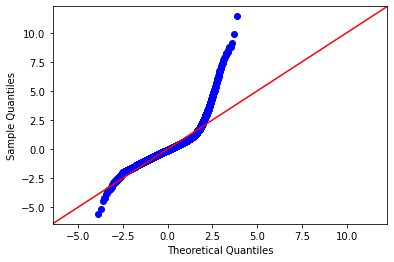

In [40]:
fig = sm.graphics.qqplot(model_1.resid, dist=stats.norm, line='45', fit=True)

### Categorical Variables: Model 2 

For this model, taking into account the categorical variables. Each categorical variable is separated to represent a more detailed model for house attributes that affect the price. 

In [41]:
df_filter['bd_bin'] = pd.cut(df_filter.bedrooms, bins=[1,2,4,7])

In [42]:
#bedroom dummy
bedroom_dummies = pd.get_dummies(df_filter.bd_bin, prefix='bedrooms', drop_first=True)
bedroom_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19885 entries, 0 to 19884
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   bedrooms_(2, 4]  19885 non-null  uint8
 1   bedrooms_(4, 7]  19885 non-null  uint8
dtypes: uint8(2)
memory usage: 39.0 KB


In [43]:
#bathroom dummie
df_filter['br_bin'] = pd.cut(df_filter.bathrooms, bins=[1,2,3,4,5])

In [44]:
bathroom_dummies = pd.get_dummies(df_filter.br_bin, prefix='bathrooms', drop_first=True)
bathroom_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19885 entries, 0 to 19884
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   bathrooms_(2, 3]  19885 non-null  uint8
 1   bathrooms_(3, 4]  19885 non-null  uint8
 2   bathrooms_(4, 5]  19885 non-null  uint8
dtypes: uint8(3)
memory usage: 58.4 KB


In [45]:
df_filter['floor_bin'] = pd.cut(df_filter.floors, bins=[1,2,3])

In [46]:
floors_dummies = pd.get_dummies(df_filter.floor_bin, prefix='floors', drop_first=True)
floors_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19885 entries, 0 to 19884
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   floors_(2, 3]  19885 non-null  uint8
dtypes: uint8(1)
memory usage: 19.5 KB


In [47]:
df_filter['grade_bin'] = pd.cut(df_filter.grade, bins=[1,5,7,11])

In [48]:
#grade dummies
grade_dummies = pd.get_dummies(df_filter.grade_bin, prefix='grade', drop_first=True)
grade_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19885 entries, 0 to 19884
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   grade_(5, 7]   19885 non-null  uint8
 1   grade_(7, 11]  19885 non-null  uint8
dtypes: uint8(2)
memory usage: 39.0 KB


In [49]:
df_dummies = pd.concat([df_filter, bedroom_dummies,bathroom_dummies, grade_dummies, floors_dummies], axis=1)

In [50]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19885 entries, 0 to 19884
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             19885 non-null  float64 
 1   bedrooms          19885 non-null  int64   
 2   bathrooms         19885 non-null  float64 
 3   sqft_living       19885 non-null  int64   
 4   sqft_lot          19885 non-null  int64   
 5   floors            19885 non-null  float64 
 6   waterfront        19885 non-null  int64   
 7   condition         19885 non-null  int64   
 8   grade             19885 non-null  int64   
 9   sqft_above        19885 non-null  int64   
 10  sqft_basement     19885 non-null  float64 
 11  yr_built          19885 non-null  int64   
 12  zipcode           19885 non-null  int64   
 13  lat               19885 non-null  float64 
 14  long              19885 non-null  float64 
 15  sqft_living15     19885 non-null  int64   
 16  sqft_lot15        1988

In [51]:
df_dummies.drop(columns=['bedrooms', 'bd_bin', 'bathrooms','br_bin', 'grade', 'grade_bin' , 'floors', 'floor_bin'],inplace=True,axis=1)

In [52]:
df_dummies.columns

Index(['price', 'sqft_living', 'sqft_lot', 'waterfront', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'bedrooms_(2, 4]',
       'bedrooms_(4, 7]', 'bathrooms_(2, 3]', 'bathrooms_(3, 4]',
       'bathrooms_(4, 5]', 'grade_(5, 7]', 'grade_(7, 11]', 'floors_(2, 3]'],
      dtype='object')

In [53]:
df_dummies.columns = [
       'price', 'sqft_living', 'sqft_lot', 'waterfront', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'bedrooms_2_4',
       'bedrooms_4_6', 'bathrooms_2_3', 'bathrooms_3_4',
       'bathrooms_4_5', 'grade_5_7', 'grade_7_9', 'floors_2_3'
]

In [54]:
outcome = 'price'
predictors = df_dummies.drop('price', axis=1)
pred_variables = '+'.join(predictors.columns)
formula = outcome + '~' + pred_variables

In [55]:
baseline_model = ols(formula = formula, data=df_dummies).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     1658.
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:29:35   Log-Likelihood:            -2.6707e+05
No. Observations:               19885   AIC:                         5.342e+05
Df Residuals:                   19863   BIC:                         5.344e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.305e+06   2.49e+06     -3.335      0.001   -1.32e+07   -3.42e+06
sqft_living     104.4045     16.086      6.491      0.000      72.875     135.934
sqft_lot          0.1415      0.125      1.132      0.258      -0.104       0.386
waterfront     6.343e+05   1.74e+04     36.416      0.000       6e+05    6.68e+05
condition      3.202e+04   1980.158     16.172      0.000    2.81e+04    3.59e+04
sqft_above       44.7884     16.056      2.789      0.005      13.317      76.260
sqft_basement    20.1688     16.025      1.259      0.208     -11.242      51.579
yr_built      -2079.7859     57.165    -36.382      0.000   -2191.835   -1967.737
zipcode        -363.1087     27.947    -12.993      0.000    -417.886    -308.331
lat            5.981e+05   9093.686     65.775      0.000     5.8e+05    6.16e+05
long          -1.589e+05   1.16e+04    -13.718      0.000   -1.82e+05   -1.36e+05
sqft_living15    98.8753      3.117     31.721      0.000      92.766     104.985
sqft_lot15       -1.8462      0.231     -7.994      0.000      -2.299      -1.394
month         -2897.6127    375.993     -7.707      0.000   -3634.590   -2160.636
bedrooms_2_4  -2.675e+04   3810.065     -7.022      0.000   -3.42e+04   -1.93e+04
bedrooms_4_6  -6.318e+04   6065.208    -10.416      0.000   -7.51e+04   -5.13e+04
bathrooms_2_3  1.215e+04   3393.957      3.581      0.000    5502.171    1.88e+04
bathrooms_3_4  1.368e+05   6473.130     21.138      0.000    1.24e+05     1.5e+05
bathrooms_4_5  2.223e+05   1.95e+04     11.384      0.000    1.84e+05    2.61e+05
grade_5_7      5.734e+04   1.15e+04      4.995      0.000    3.48e+04    7.98e+04
grade_7_9      1.514e+05    1.2e+04     12.671      0.000    1.28e+05    1.75e+05
floors_2_3     8.247e+04   6791.794     12.143      0.000    6.92e+04    9.58e+04
==============================================================================
Omnibus:                     8970.139   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           103552.887
Skew:                           1.864   Prob(JB):                         0.00
Kurtosis:                      13.540   Cond. No.                     2.11e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The intercept is at -8305000, and r-squared is .637. Though the accruacy for the model has decresed, this maybe due to each category being closely coorrelated. The model shows how each category effect the price increasing or decreasing the value of the house. An increase in bedrooms lead to a decrease in value while more bathrooms, a higher grade, and additional floors show an increase in value.  

In [56]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19885 entries, 0 to 19884
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19885 non-null  float64
 1   sqft_living    19885 non-null  int64  
 2   sqft_lot       19885 non-null  int64  
 3   waterfront     19885 non-null  int64  
 4   condition      19885 non-null  int64  
 5   sqft_above     19885 non-null  int64  
 6   sqft_basement  19885 non-null  float64
 7   yr_built       19885 non-null  int64  
 8   zipcode        19885 non-null  int64  
 9   lat            19885 non-null  float64
 10  long           19885 non-null  float64
 11  sqft_living15  19885 non-null  int64  
 12  sqft_lot15     19885 non-null  int64  
 13  month          19885 non-null  int64  
 14  bedrooms_2_4   19885 non-null  uint8  
 15  bedrooms_4_6   19885 non-null  uint8  
 16  bathrooms_2_3  19885 non-null  uint8  
 17  bathrooms_3_4  19885 non-null  uint8  
 18  bathro

In [57]:
X = df_dummies.drop(columns=['price'], axis=1)
y= df_dummies['price']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, test_size=.20)

In [59]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

15908 3977 15908 3977


In [60]:
baseline_linreg = LinearRegression()

In [61]:
baseline_linreg.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = baseline_linreg.predict(X_test)

In [63]:
residuals = y_pred - y_test

In [64]:
mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train), squared=False)
mse_train

165818.58227999392

In [65]:
mse_test = mean_squared_error(y_test, y_pred, squared=False)
mse_test

160376.07396885077

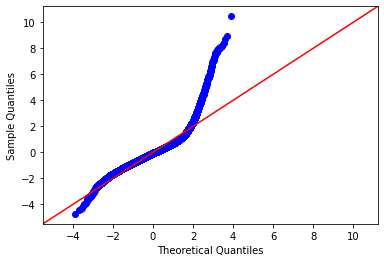

In [66]:
fig = sm.graphics.qqplot(baseline_model.resid, dist=stats.norm, line='45', fit=True)

### Geographic Sectors :Model 3

This model will separate the map into geographic sectors to show a difference in price depending on location. 

In [67]:
df_geographic_sectors = df_dummies
df_geographic_sectors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19885 entries, 0 to 19884
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19885 non-null  float64
 1   sqft_living    19885 non-null  int64  
 2   sqft_lot       19885 non-null  int64  
 3   waterfront     19885 non-null  int64  
 4   condition      19885 non-null  int64  
 5   sqft_above     19885 non-null  int64  
 6   sqft_basement  19885 non-null  float64
 7   yr_built       19885 non-null  int64  
 8   zipcode        19885 non-null  int64  
 9   lat            19885 non-null  float64
 10  long           19885 non-null  float64
 11  sqft_living15  19885 non-null  int64  
 12  sqft_lot15     19885 non-null  int64  
 13  month          19885 non-null  int64  
 14  bedrooms_2_4   19885 non-null  uint8  
 15  bedrooms_4_6   19885 non-null  uint8  
 16  bathrooms_2_3  19885 non-null  uint8  
 17  bathrooms_3_4  19885 non-null  uint8  
 18  bathro

In [68]:
df_geographic_sectors.loc[(df_geographic_sectors.lat > 47.69) & (df_geographic_sectors.long < -122.28), "sector_1"] = 1

In [69]:
df_geographic_sectors.sector_1.value_counts()

1.0    1994
Name: sector_1, dtype: int64

<AxesSubplot:xlabel='long', ylabel='lat'>

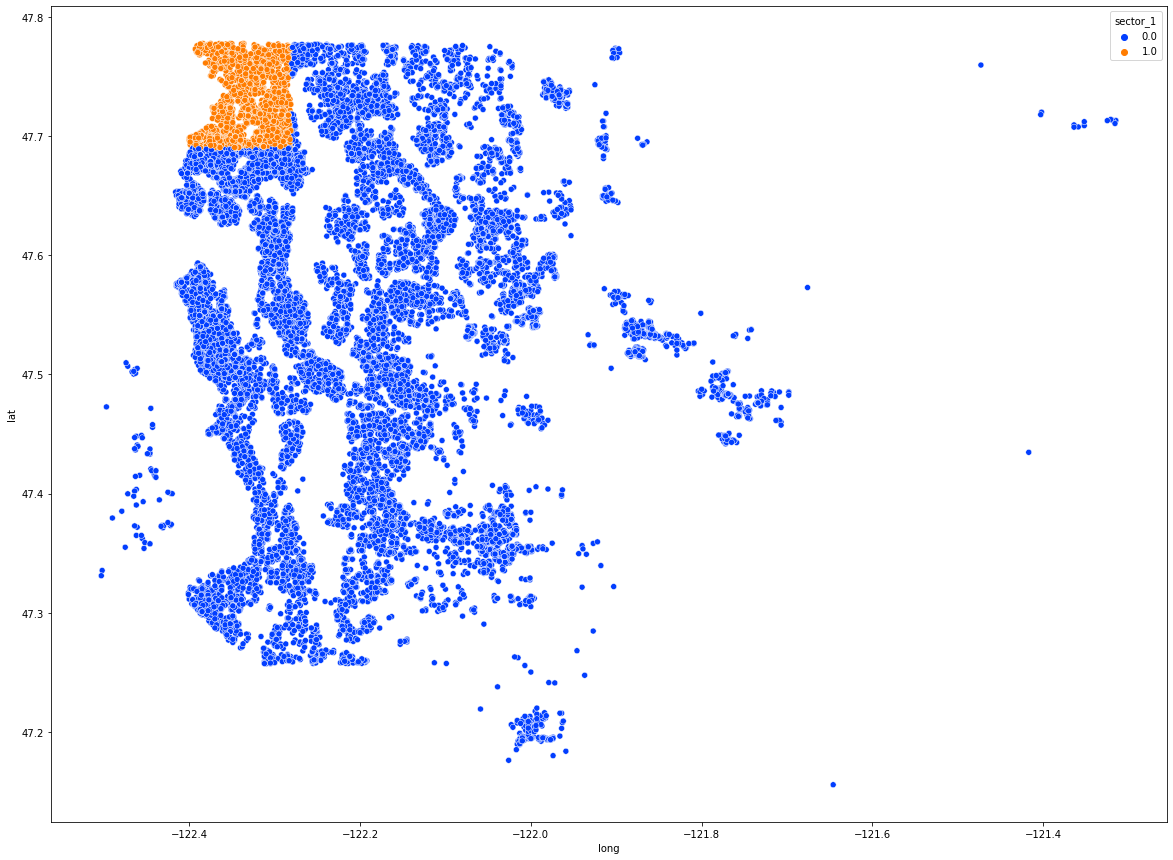

In [70]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = "sector_1",  data =df_geographic_sectors.fillna(0) , palette='bright')

In [71]:
df_geographic_sectors.loc[(df_geographic_sectors.lat > 47.68) & (df_geographic_sectors.long > -122.28), "sector_2"] = 1

In [72]:
df_geographic_sectors.sector_2.value_counts()

1.0    2402
Name: sector_2, dtype: int64

<AxesSubplot:xlabel='long', ylabel='lat'>

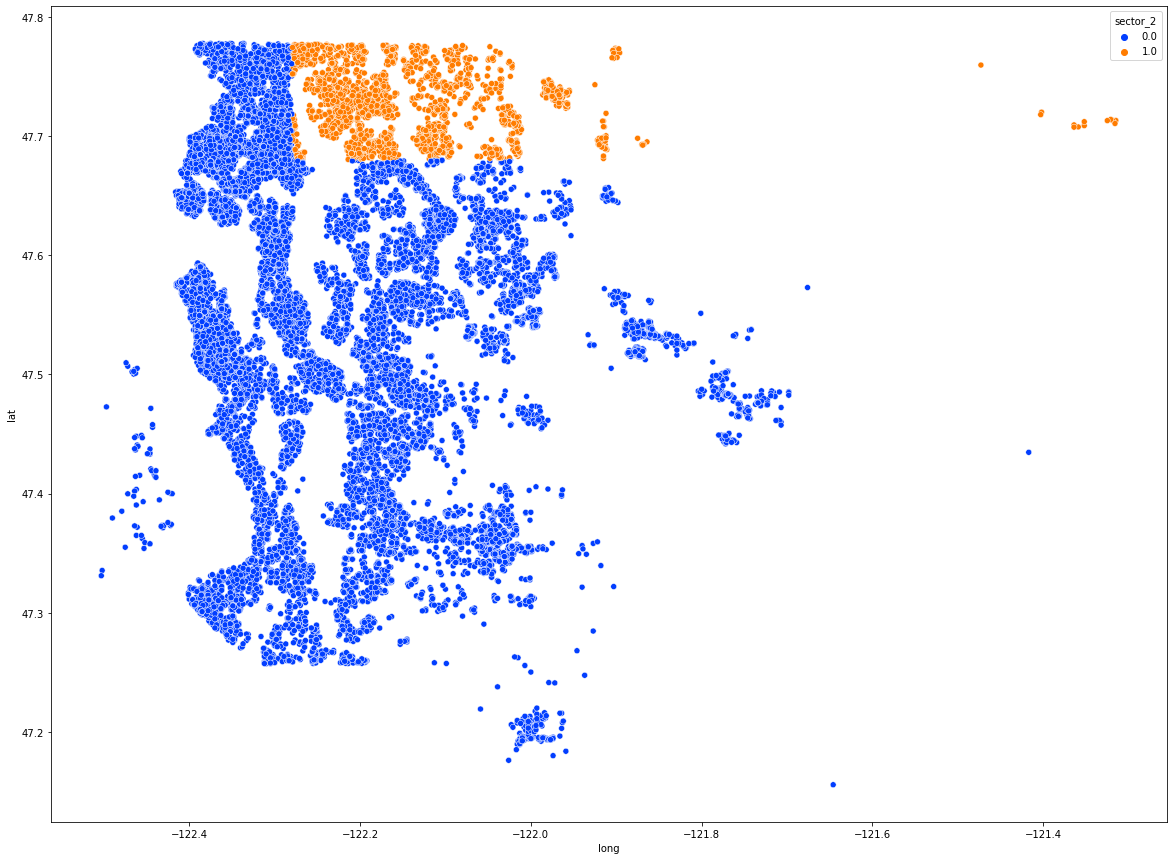

In [73]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = 'sector_2',  data =df_geographic_sectors.fillna(0) , palette='bright')

In [74]:
df_geographic_sectors.loc[(df_geographic_sectors.lat < 47.69) & (df_geographic_sectors.lat > 47.64) & (df_geographic_sectors.long < -122.2), "sector_3"] = 1

In [75]:
df_geographic_sectors.sector_3.value_counts()

1.0    2135
Name: sector_3, dtype: int64

<AxesSubplot:xlabel='long', ylabel='lat'>

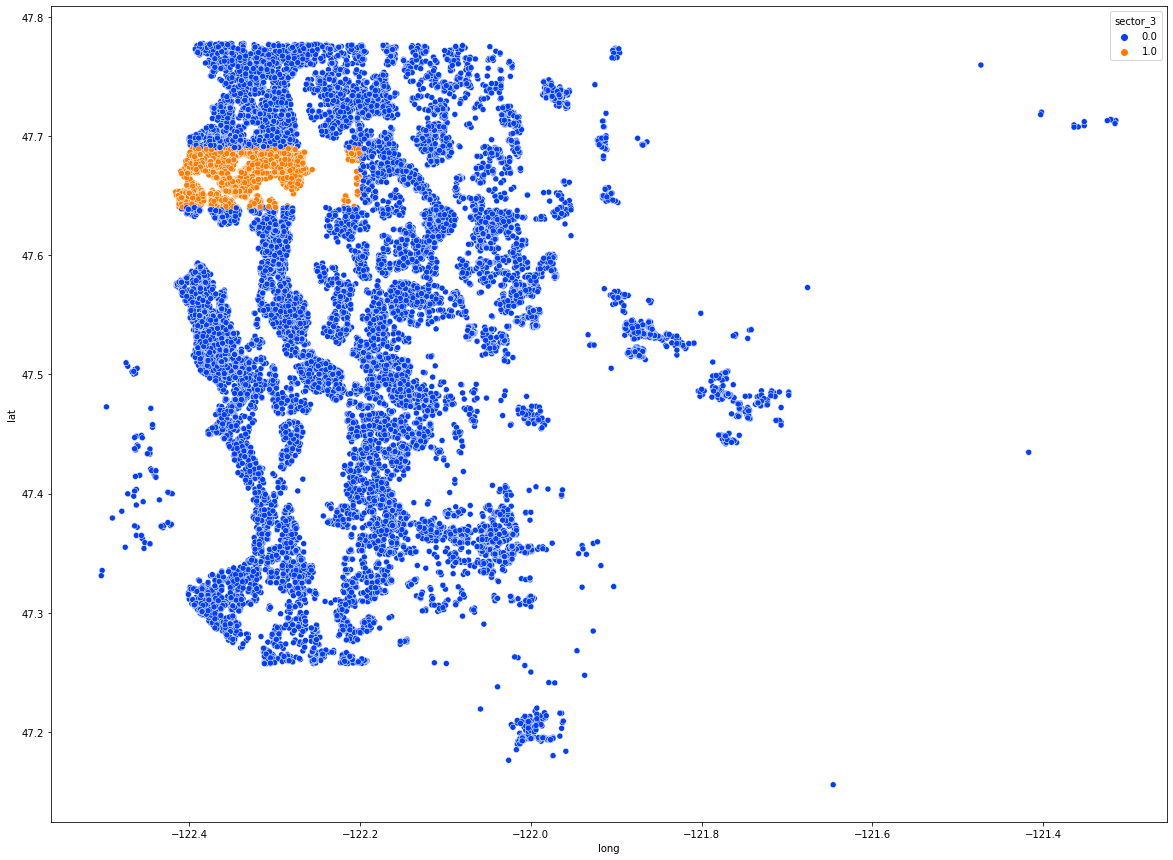

In [76]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = 'sector_3',  data =df_geographic_sectors.fillna(0) , palette='bright')

In [77]:
df_geographic_sectors.loc[(df_geographic_sectors.lat < 47.64) & (df_geographic_sectors.lat > 47.55) & (df_geographic_sectors.long < -122.2), "sector_4"] = 1

In [78]:
df_geographic_sectors.sector_4.value_counts()

1.0    2256
Name: sector_4, dtype: int64

<AxesSubplot:xlabel='long', ylabel='lat'>

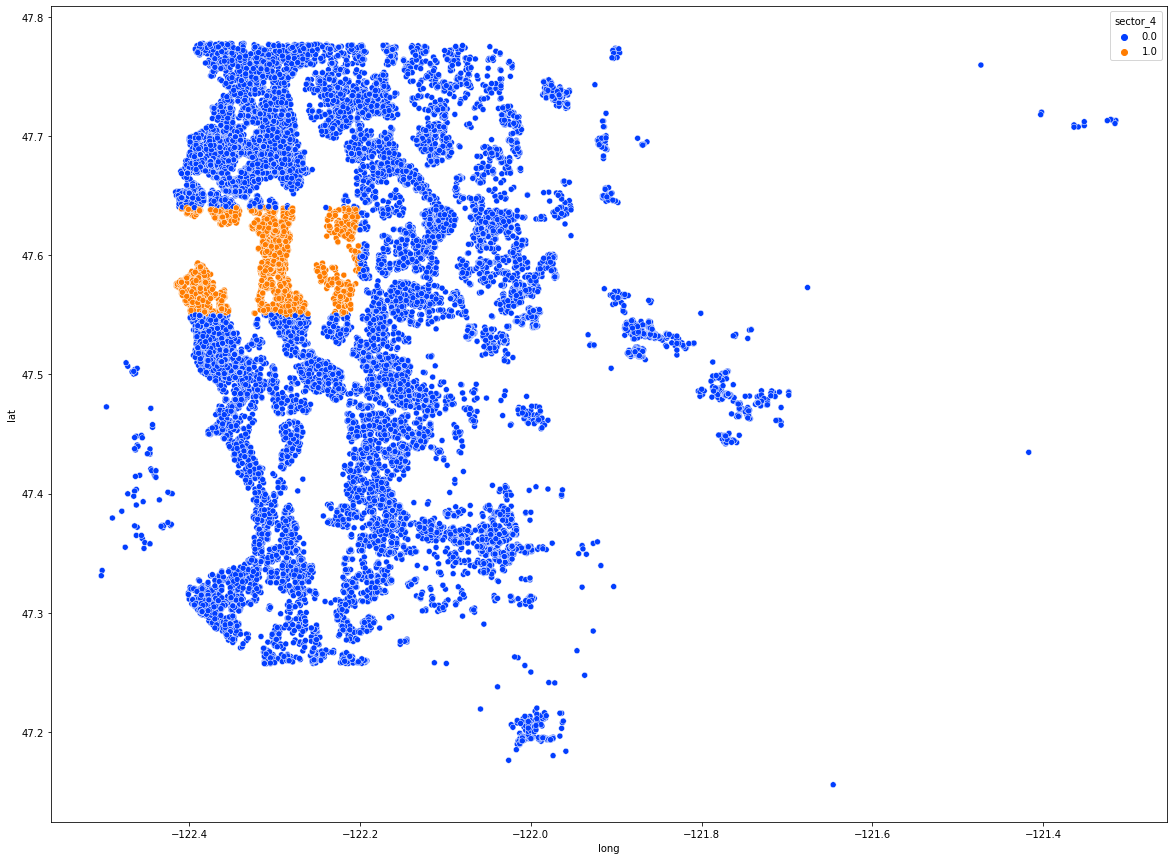

In [79]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = 'sector_4',  data =df_geographic_sectors.fillna(0) , palette='bright')

In [80]:
df_geographic_sectors.loc[(df_geographic_sectors.lat < 47.68) & (df_geographic_sectors.lat > 47.55) & (df_geographic_sectors.long > -122.2), "sector_5"] = 1

In [81]:
df_dummies.sector_5.value_counts()

1.0    2506
Name: sector_5, dtype: int64

<AxesSubplot:xlabel='long', ylabel='lat'>

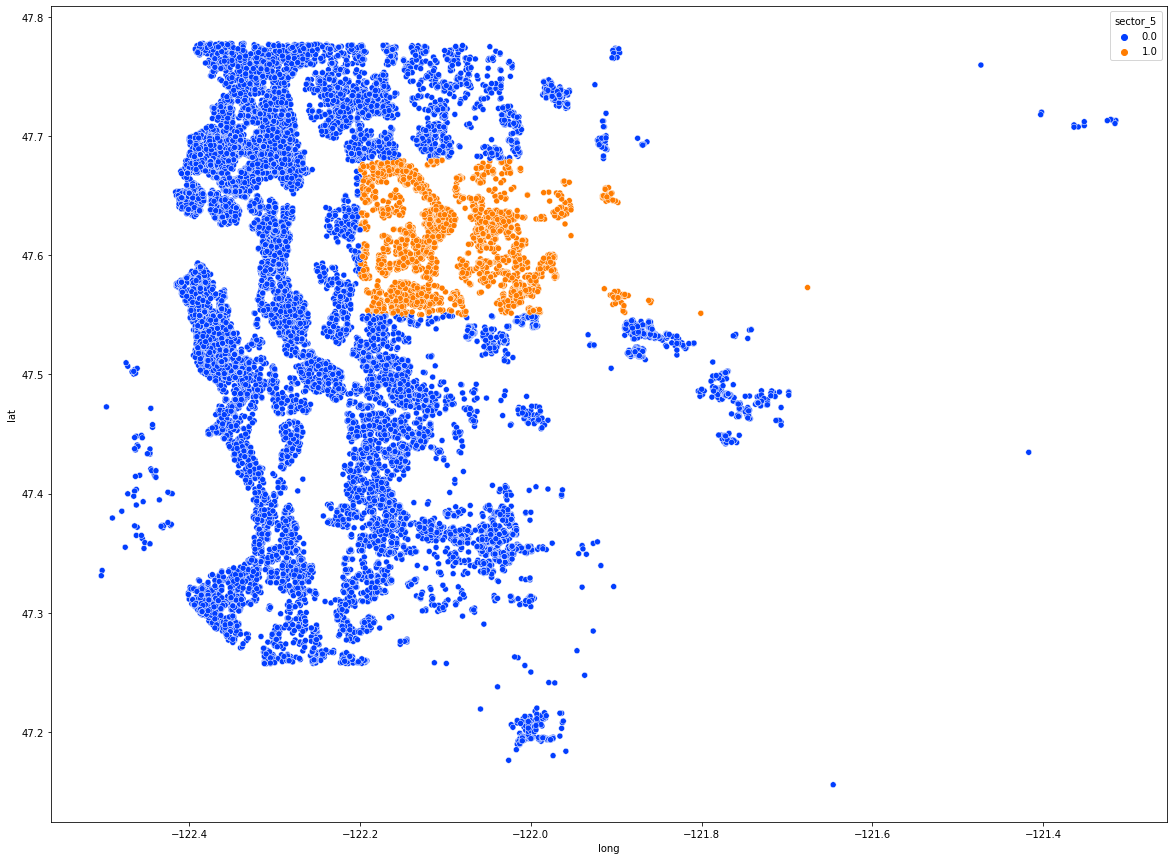

In [82]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = 'sector_5',  data =df_geographic_sectors.fillna(0) , palette='bright')

In [83]:
df_geographic_sectors.loc[(df_geographic_sectors.lat < 47.55) & (df_geographic_sectors.lat > 47.45) & (df_geographic_sectors.long < -122.2), "sector_6"] = 1

In [84]:
df_dummies.sector_6.value_counts()

1.0    2275
Name: sector_6, dtype: int64

<AxesSubplot:xlabel='long', ylabel='lat'>

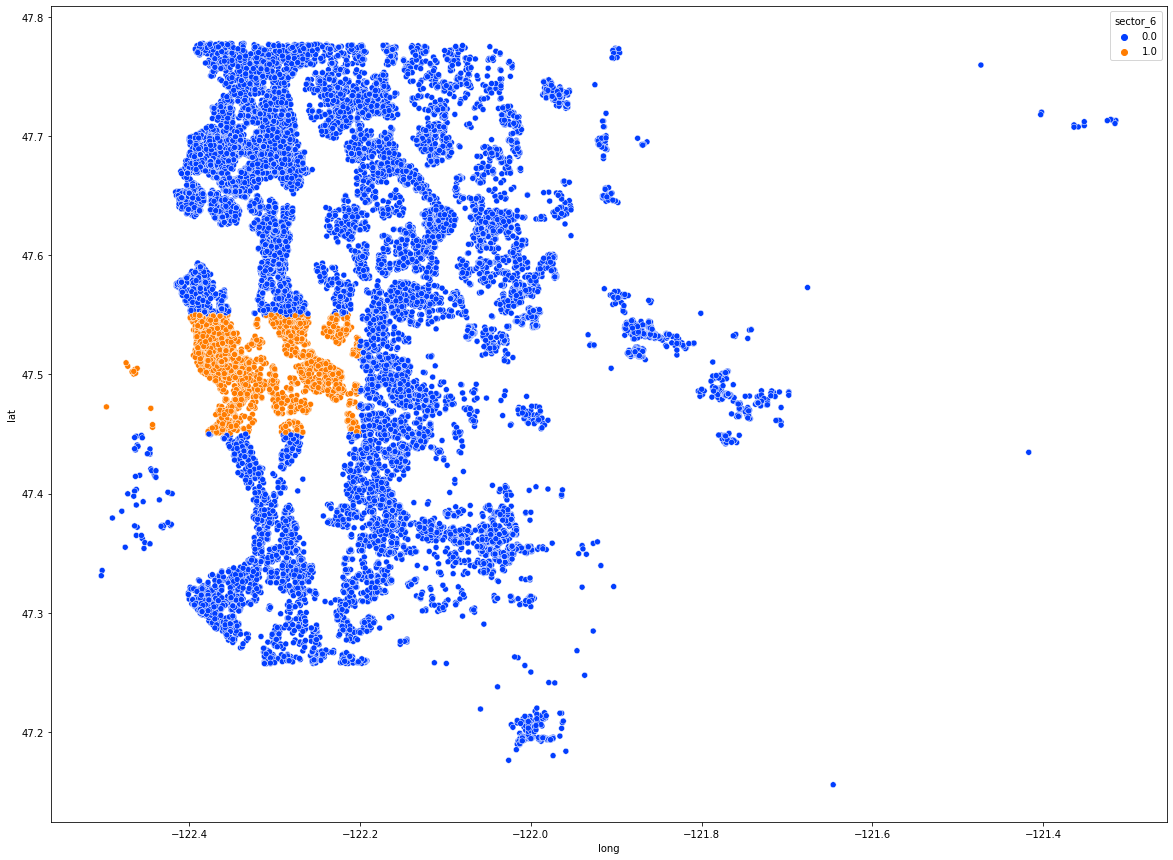

In [85]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = 'sector_6',  data =df_geographic_sectors.fillna(0) , palette='bright')

In [86]:
df_geographic_sectors.loc[(df_geographic_sectors.lat < 47.55) & (df_geographic_sectors.lat > 47.45) & (df_geographic_sectors.long > -122.2), "sector_7"] = 1

In [87]:
df_dummies.sector_7.value_counts()

1.0    1897
Name: sector_7, dtype: int64

<AxesSubplot:xlabel='long', ylabel='lat'>

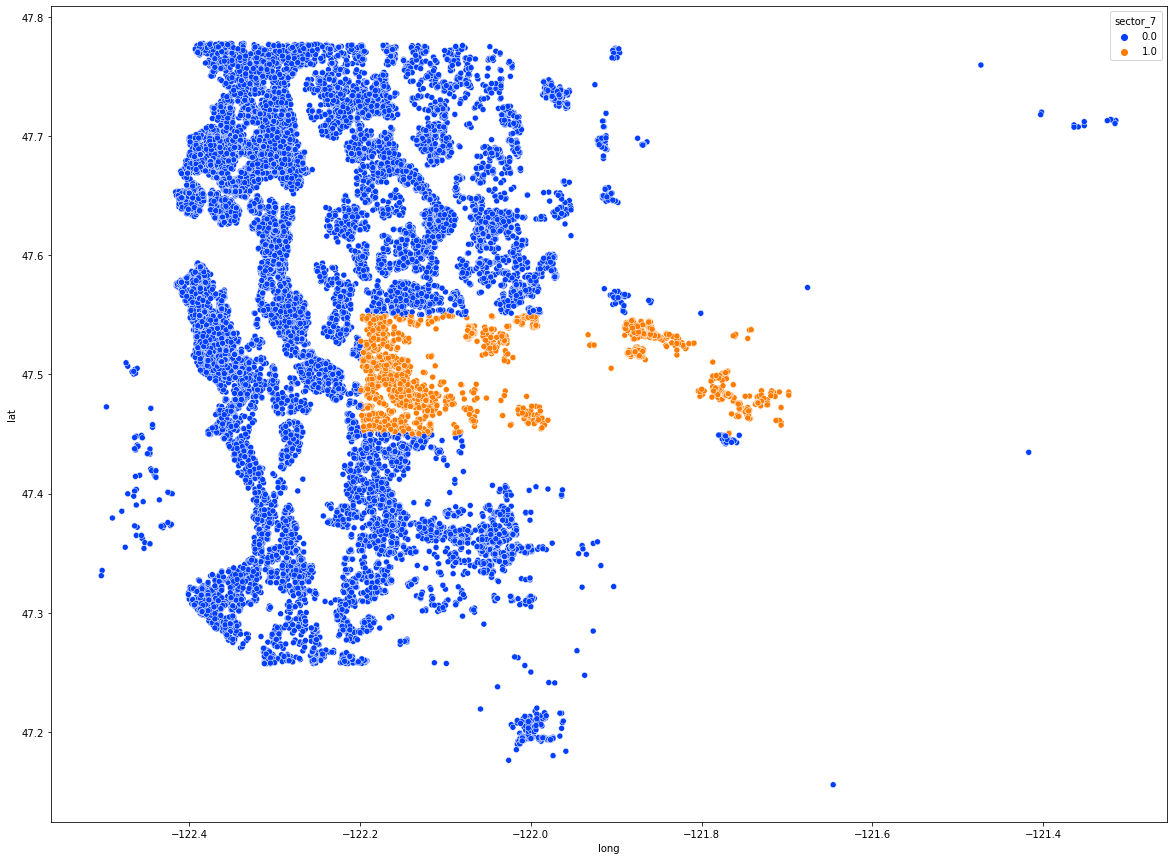

In [88]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = 'sector_7',  data =df_geographic_sectors.fillna(0) , palette='bright')

In [89]:
df_geographic_sectors.loc[(df_geographic_sectors.lat < 47.45) & (df_geographic_sectors.long < -122.2), "sector_8"] = 1

In [90]:
df_geographic_sectors.sector_8.value_counts()

1.0    2144
Name: sector_8, dtype: int64

<AxesSubplot:xlabel='long', ylabel='lat'>

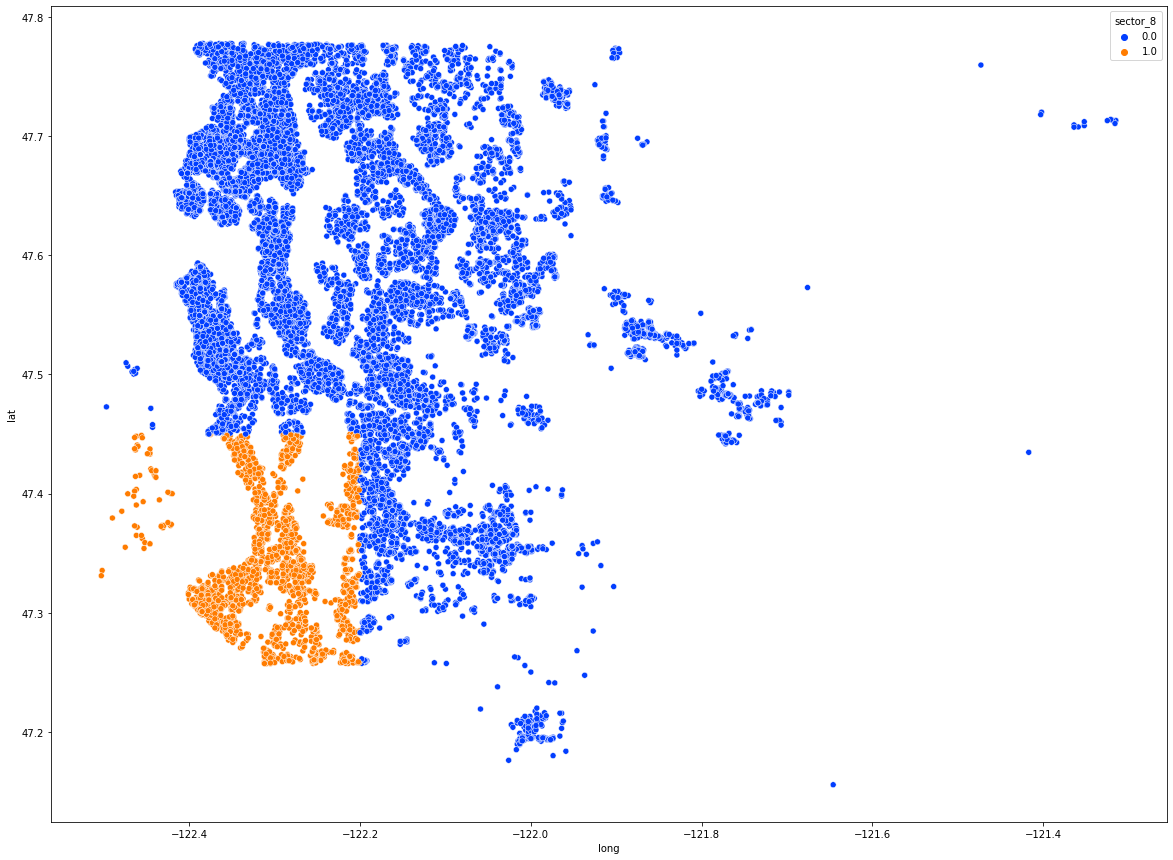

In [91]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = 'sector_8',  data =df_geographic_sectors.fillna(0) , palette='bright')

In [92]:
df_geographic_sectors.loc[(df_geographic_sectors.lat < 47.45) & (df_geographic_sectors.long > -122.2), "sector_9"] = 1

In [93]:
df_geographic_sectors.sector_9.value_counts()

1.0    2279
Name: sector_9, dtype: int64

<AxesSubplot:xlabel='long', ylabel='lat'>

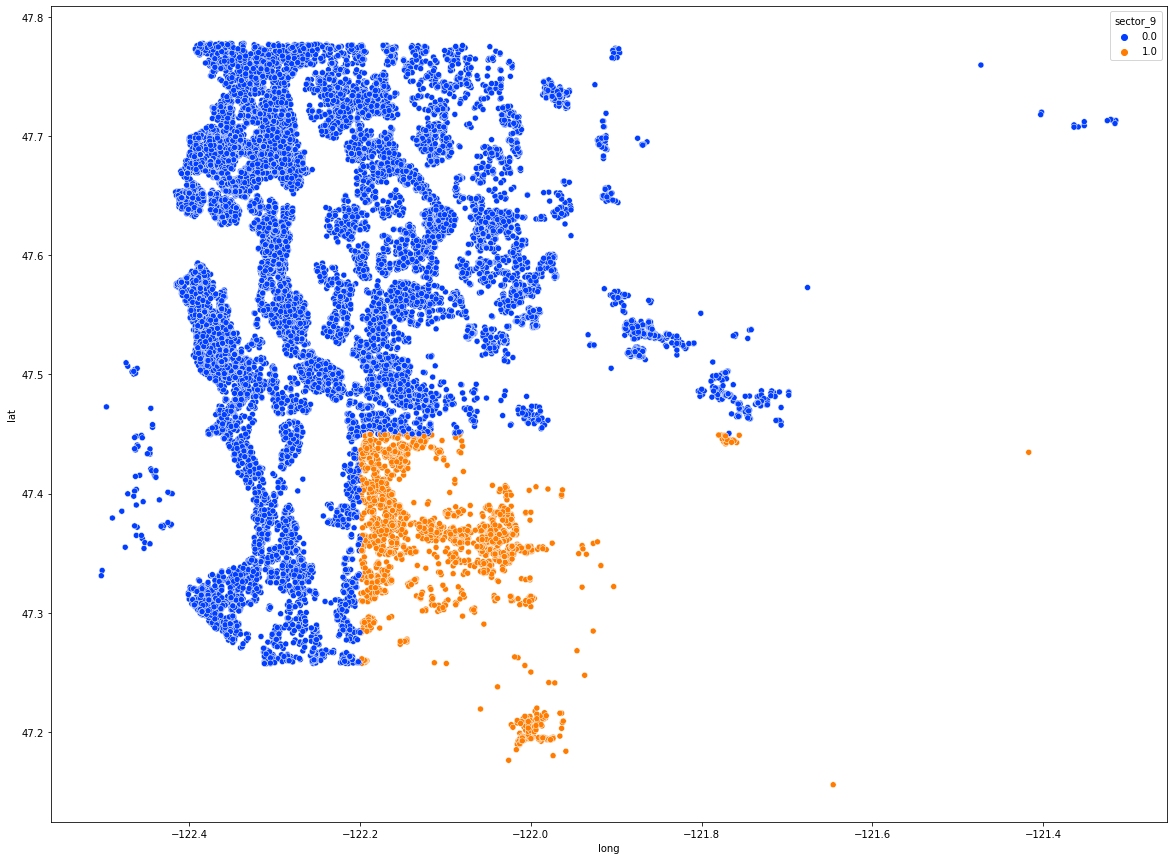

In [94]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = 'sector_9',  data =df_geographic_sectors.fillna(0) , palette='bright')

In [95]:
df_geographic_sectors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19885 entries, 0 to 19884
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19885 non-null  float64
 1   sqft_living    19885 non-null  int64  
 2   sqft_lot       19885 non-null  int64  
 3   waterfront     19885 non-null  int64  
 4   condition      19885 non-null  int64  
 5   sqft_above     19885 non-null  int64  
 6   sqft_basement  19885 non-null  float64
 7   yr_built       19885 non-null  int64  
 8   zipcode        19885 non-null  int64  
 9   lat            19885 non-null  float64
 10  long           19885 non-null  float64
 11  sqft_living15  19885 non-null  int64  
 12  sqft_lot15     19885 non-null  int64  
 13  month          19885 non-null  int64  
 14  bedrooms_2_4   19885 non-null  uint8  
 15  bedrooms_4_6   19885 non-null  uint8  
 16  bathrooms_2_3  19885 non-null  uint8  
 17  bathrooms_3_4  19885 non-null  uint8  
 18  bathro

In [96]:
df_geographic_sectors.sector_1.fillna(value=0, axis=0, inplace=True)
df_geographic_sectors.sector_1.isna().sum()

0

In [97]:
df_geographic_sectors.sector_2.fillna(value=0, axis=0, inplace=True)
df_geographic_sectors.sector_2.isna().sum()

0

In [98]:
df_geographic_sectors.sector_3.fillna(value=0, axis=0, inplace=True)
df_geographic_sectors.sector_3.isna().sum()

0

In [99]:
df_geographic_sectors.sector_4.fillna(value=0, axis=0, inplace=True)
df_geographic_sectors.sector_4.isna().sum()

0

In [100]:
df_geographic_sectors.sector_5.fillna(value=0, axis=0, inplace=True)
df_geographic_sectors.sector_5.isna().sum()

0

In [101]:
df_geographic_sectors.sector_6.fillna(value=0, axis=0, inplace=True)
df_geographic_sectors.sector_6.isna().sum()

0

In [102]:
df_geographic_sectors.sector_7.fillna(value=0, axis=0, inplace=True)
df_geographic_sectors.sector_7.isna().sum()

0

In [103]:
df_geographic_sectors.sector_8.fillna(value=0, axis=0, inplace=True)
df_geographic_sectors.sector_8.isna().sum()

0

In [104]:
df_geographic_sectors.sector_9.fillna(value=0, axis=0, inplace=True)
df_geographic_sectors.sector_9.isna().sum()

0

In [105]:
df_geographic_sectors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19885 entries, 0 to 19884
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19885 non-null  float64
 1   sqft_living    19885 non-null  int64  
 2   sqft_lot       19885 non-null  int64  
 3   waterfront     19885 non-null  int64  
 4   condition      19885 non-null  int64  
 5   sqft_above     19885 non-null  int64  
 6   sqft_basement  19885 non-null  float64
 7   yr_built       19885 non-null  int64  
 8   zipcode        19885 non-null  int64  
 9   lat            19885 non-null  float64
 10  long           19885 non-null  float64
 11  sqft_living15  19885 non-null  int64  
 12  sqft_lot15     19885 non-null  int64  
 13  month          19885 non-null  int64  
 14  bedrooms_2_4   19885 non-null  uint8  
 15  bedrooms_4_6   19885 non-null  uint8  
 16  bathrooms_2_3  19885 non-null  uint8  
 17  bathrooms_3_4  19885 non-null  uint8  
 18  bathro

In [106]:
outcome = 'price'
predictors = df_geographic_sectors.drop(columns = ['price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [107]:
model_3 = ols(formula = formula, data = df_geographic_sectors).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1707.
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:29:43   Log-Likelihood:            -2.6446e+05
No. Observations:               19885   AIC:                         5.290e+05
Df Residuals:                   19854   BIC:                         5.292e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.455e+07   3.21e+06     13.889      0.000    3.83e+07    5.08e+07
sqft_living      98.3487     14.113      6.969      0.000      70.686     126.011
sqft_lot          0.4033      0.110      3.674      0.000       0.188       0.618
waterfront     6.756e+05   1.53e+04     44.142      0.000    6.46e+05    7.06e+05
condition       3.63e+04   1749.828     20.743      0.000    3.29e+04    3.97e+04
sqft_above       56.4984     14.089      4.010      0.000      28.883      84.113
sqft_basement    13.3532     14.060      0.950      0.342     -14.206      40.913
yr_built       -700.9037     53.493    -13.103      0.000    -805.755    -596.052
zipcode        -751.1566     29.693    -25.298      0.000    -809.357    -692.956
lat            5.331e+05   2.83e+04     18.822      0.000    4.78e+05    5.89e+05
long          -4.043e+04   1.38e+04     -2.933      0.003   -6.75e+04   -1.34e+04
sqft_living15    93.3722      2.751     33.947      0.000      87.981      98.763
sqft_lot15        0.2035      0.205      0.992      0.321      -0.199       0.606
month         -2789.8894    329.853     -8.458      0.000   -3436.428   -2143.350
bedrooms_2_4  -7869.7638   3359.091     -2.343      0.019   -1.45e+04   -1285.665
bedrooms_4_6  -4.451e+04   5334.113     -8.344      0.000    -5.5e+04   -3.41e+04
bathrooms_2_3  -249.8042   2985.935     -0.084      0.933   -6102.487    5602.878
bathrooms_3_4  8.914e+04   5717.524     15.590      0.000    7.79e+04       1e+05
bathrooms_4_5  1.734e+05   1.72e+04     10.112      0.000     1.4e+05    2.07e+05
grade_5_7      7147.0212   1.01e+04      0.707      0.480   -1.27e+04     2.7e+04
grade_7_9      6.502e+04   1.06e+04      6.155      0.000    4.43e+04    8.57e+04
floors_2_3     1.605e+04   6080.789      2.640      0.008    4136.037     2.8e+04
sector_1       6.881e+04   1.44e+04      4.794      0.000    4.07e+04    9.69e+04
sector_2      -2.074e+04   1.41e+04     -1.467      0.142   -4.84e+04    6964.336
sector_3       2.651e+05   1.38e+04     19.181      0.000    2.38e+05    2.92e+05
sector_4        2.88e+05   1.41e+04     20.358      0.000     2.6e+05    3.16e+05
sector_5       9.241e+04   1.42e+04      6.504      0.000    6.46e+04     1.2e+05
sector_6       1.153e+05   1.46e+04      7.910      0.000    8.68e+04    1.44e+05
sector_7       1.983e+04   1.47e+04      1.353      0.176   -8909.027    4.86e+04
sector_8       1.086e+04   1.62e+04      0.672      0.502   -2.08e+04    4.25e+04
sector_9       9014.7669   1.59e+04      0.566      0.571   -2.22e+04    4.02e+04
==============================================================================
Omnibus:                    10334.126   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           172604.938
Skew:                           2.112   Prob(JB):         

The intercept is 44,550,000, and r-squared .721. Here can see the price effects between each sector. Sector 4 shows the largest increase while sector 2 shows a decrease in price. 

In [108]:
X = df_geographic_sectors.drop(columns=['price'], axis=1)
y= df_geographic_sectors['price']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, test_size=.20)

In [110]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

15908 3977 15908 3977


In [111]:
baseline_linreg = LinearRegression()

In [112]:
baseline_linreg.fit(X_train, y_train)

LinearRegression()

In [113]:
y_pred = baseline_linreg.predict(X_test)

In [114]:
residuals = y_pred - y_test

In [115]:
mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train), squared=False)
mse_train

143322.92062743218

In [116]:
mse_test = mean_squared_error(y_test, y_pred, squared=False)
mse_test

149136.5355796606

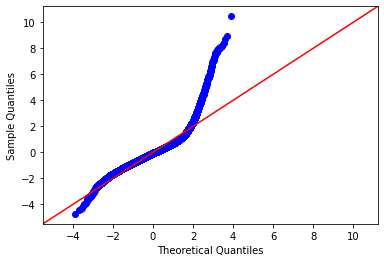

In [117]:
fig = sm.graphics.qqplot(baseline_model.resid, dist=stats.norm, line='45', fit=True)

### Multicollinearity: Model 4

This model will adjust for multicollinearity in order to account for high p-values.

In [118]:
#df_multico = df_geographic_sectors.drop(columns=['price'])
df_multico = df_geographic_sectors

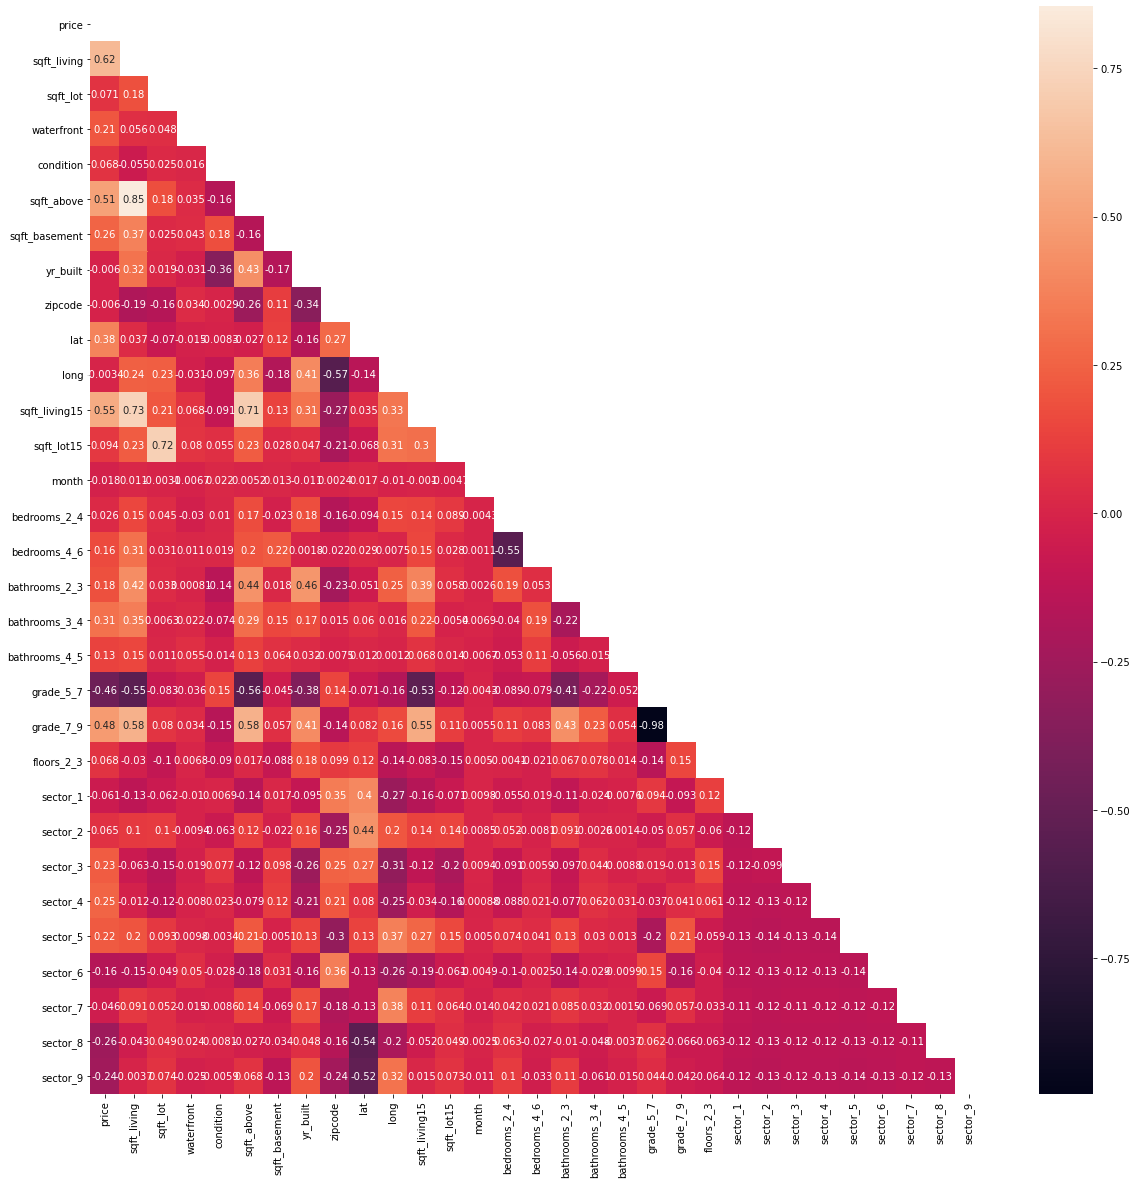

In [119]:
corr = df_multico.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, annot = True);

In [120]:
df_multico.drop(columns=['zipcode', 'lat', 'long','sqft_above', 'sqft_lot15','bedrooms_2_4', 'bathrooms_2_3', 'grade_5_7', 'sector_6'], axis=1, inplace=True)

In [121]:
outcome = 'price'
predictors = df_multico.drop(columns = ['price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [122]:
model_4 = ols(formula = formula, data = df_multico).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     2300.
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:29:48   Log-Likelihood:            -2.6488e+05
No. Observations:               19885   AIC:                         5.298e+05
Df Residuals:                   19863   BIC:                         5.300e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.268e+06   1.01e+05     12.540      0.000    1.07e+06    1.47e+06
sqft_living     149.2147      2.614     57.078      0.000     144.091     154.339
sqft_lot          0.4160      0.082      5.068      0.000       0.255       0.577
waterfront     6.627e+05   1.56e+04     42.577      0.000    6.32e+05    6.93e+05
condition      3.748e+04   1769.005     21.189      0.000     3.4e+04     4.1e+04
sqft_basement   -39.0121      3.215    -12.134      0.000     -45.314     -32.710
yr_built       -726.5520     50.707    -14.328      0.000    -825.943    -627.161
sqft_living15    99.0537      2.771     35.750      0.000      93.623     104.485
month         -2739.5894    336.726     -8.136      0.000   -3399.599   -2079.579
bedrooms_4_6  -3.267e+04   4213.564     -7.752      0.000   -4.09e+04   -2.44e+04
bathrooms_3_4  8.785e+04   4962.604     17.703      0.000    7.81e+04    9.76e+04
bathrooms_4_5  1.824e+05   1.71e+04     10.651      0.000    1.49e+05    2.16e+05
grade_7_9      5.998e+04   2896.435     20.708      0.000    5.43e+04    6.57e+04
floors_2_3     2.348e+04   6186.394      3.796      0.000    1.14e+04    3.56e+04
sector_1       6.683e+04   4512.513     14.810      0.000     5.8e+04    7.57e+04
sector_2       3.958e+04   4484.115      8.826      0.000    3.08e+04    4.84e+04
sector_3       2.433e+05   4509.087     53.957      0.000    2.34e+05    2.52e+05
sector_4        2.31e+05   4449.968     51.909      0.000    2.22e+05     2.4e+05
sector_5       9.178e+04   4556.540     20.142      0.000    8.28e+04    1.01e+05
sector_7      -4.608e+04   4826.389     -9.548      0.000   -5.55e+04   -3.66e+04
sector_8      -1.352e+05   4508.551    -29.994      0.000   -1.44e+05   -1.26e+05
sector_9      -1.276e+05   4647.600    -27.458      0.000   -1.37e+05   -1.19e+05
==============================================================================
Omnibus:                    10500.384   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           172804.302
Skew:                           2.164   Prob(JB):                         0.00
Kurtosis:                      16.778   Cond. No.                     1.64e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model shows an intercept of 1,268,000 and r-squared .709. Removing unnecessary and multi-colinear variables takes away from the models ability to generalize for all the houses. Although, without unnecessary and multi-colinear variables, the model has less interference between each variable, increasing variables independence to make a more sound model for predicting price. 

In [123]:
X = df_geographic_sectors.drop(columns=['price'], axis=1)
y= df_geographic_sectors['price']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, test_size=.20)

In [125]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

15908 3977 15908 3977


In [126]:
baseline_linreg = LinearRegression()

In [127]:
baseline_linreg.fit(X_train, y_train)

LinearRegression()

In [128]:
y_pred = baseline_linreg.predict(X_test)

In [129]:
residuals = y_pred - y_test

In [130]:
mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train), squared=False)
mse_train

146615.69582919753

In [131]:
mse_test = mean_squared_error(y_test, y_pred, squared=False)
mse_test

151355.17569380742

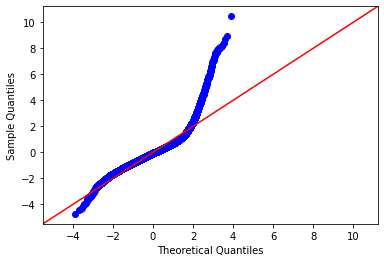

In [132]:
fig = sm.graphics.qqplot(baseline_model.resid, dist=stats.norm, line='45', fit=True)